## Dependencies
***

In [10]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Data Sets
***

In [11]:
#get Data files and turn into DataFrames

nba_data_excel = "NBA_Data_2000.xlsx"
player_data_excel = "player_heightweight_data(cleanedinches).xlsm"

nba_data_df = pd.read_excel(nba_data_excel)
height_weight_df = pd.read_excel(player_data_excel)


### DataFrame Cleaning/Manipulation
***

In [12]:
#preview DataFrames
#print(nba_data_df.count())
#print(height_weight_df.count())

In [13]:
#drop N/A values in year: nba_data_df
nba_data_df['Year'] = nba_data_df.Year.fillna(0)

#convert year into integer value
nba_data_df['Year'] = nba_data_df.Year.astype(int)

#Change 'Player' column to 'name'
nba_data_df = nba_data_df.rename(columns={"Player":"name"})

#Preview nba_data_df

nba_data_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
3,2000,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
4,2000,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0


In [14]:
#drop N/A values in year: nba_data_df
height_weight_df['weight'] = height_weight_df.weight.fillna(0)

#Convert weight into integer value: height_weight_df
height_weight_df['weight'] = height_weight_df.weight.astype(int)

#Preview
height_weight_df.head()

,name,position,weight,height (inches),height(feet)
0,Alaa Abdelnaby,F-C,240,82,6ft 10in
1,Zaid Abdul-Aziz,NaN,235,81,6ft 9in
2,Kareem Abdul-Jabbar,C,225,86,7ft 2in
3,Mahmoud Abdul-Rauf,G,162,73,6ft 1in
4,Tariq Abdul-Wahad,F,223,78,6ft 6in


#### Merged Data Frames

In [15]:
#Merge Both DataFrames on: 'name' column

merged_df = pd.merge(nba_data_df, height_weight_df)
merged_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,position,weight,height (inches),height(feet)
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,F,223,78,6ft 6in
1,2000,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,72.0,53.0,16.0,87.0,116.0,563.0,F,223,78,6ft 6in
2,2000,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,26.0,6.0,12.0,19.0,31.0,134.0,F,223,78,6ft 6in
3,2001,Tariq Abdul-Wahad,SG,26.0,DEN,29.0,12.0,420.0,5.8,0.438,...,22.0,14.0,13.0,34.0,54.0,111.0,F,223,78,6ft 6in
4,2002,Tariq Abdul-Wahad,SG,27.0,TOT,24.0,12.0,441.0,9.8,0.418,...,24.0,20.0,10.0,27.0,56.0,135.0,F,223,78,6ft 6in


### Cleaning Data Frame: 'complete_df'

In [37]:
#remove 'unnamed' and 'position' columns

complete_df = merged_df.drop(["position"],axis=1)
complete_df = complete_df.sort_values(by="Year")


In [38]:
#Conditional function to isolate big men and small men

def f(row):
    if row['Pos'] == 'C' or row['Pos'] == 'F' or row['Pos'] == 'C-F' or row['Pos'] == 'F-C' or row ['Pos'] == 'PF':
        val = 'bm'
    else:
        val = 'sm'
    return val
complete_df['men'] = complete_df.apply(f, axis = 1)

In [50]:
#Clean complete df further

complete_df = complete_df.reset_index()
complete_df = complete_df.drop(['index'],axis=1)

#complete_df.head()

##--Year Filter--#

year_filter = (complete_df.Year >= 1990)
complete_df = complete_df[year_filter]
complete_df


,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet),men
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,223,78,6ft 6in,sm
1,2000,Chris Gatling,PF,32.0,TOT,85.0,0.0,1811.0,17.3,0.525,...,71.0,82.0,23.0,169.0,246.0,1014.0,220,82,6ft 10in,bm
2,2000,Chris Gatling,PF,32.0,ORL,45.0,0.0,1041.0,17.4,0.525,...,40.0,48.0,10.0,105.0,142.0,598.0,220,82,6ft 10in,bm
3,2000,Chris Gatling,PF,32.0,DEN,40.0,0.0,770.0,17.1,0.525,...,31.0,34.0,13.0,64.0,104.0,416.0,220,82,6ft 10in,bm
4,2000,Matt Geiger,C,30.0,PHI,65.0,20.0,1406.0,13.9,0.483,...,39.0,29.0,22.0,91.0,194.0,629.0,243,85,7ft 1in,bm
5,2000,Devean George,SF,22.0,LAL,49.0,1.0,345.0,12.1,0.478,...,12.0,10.0,4.0,21.0,54.0,155.0,220,80,6ft 8in,sm
6,2000,Loy Vaught,PF,31.0,DET,43.0,0.0,292.0,8.5,0.390,...,11.0,6.0,4.0,11.0,45.0,75.0,230,81,6ft 9in,bm
7,2000,Jacque Vaughn,PG,24.0,UTA,78.0,0.0,884.0,9.2,0.489,...,121.0,32.0,0.0,77.0,92.0,289.0,190,73,6ft 1in,sm
8,2000,Wayne Turner,PG,23.0,BOS,3.0,0.0,41.0,-1.7,0.231,...,5.0,0.0,0.0,3.0,4.0,4.0,190,74,6ft 2in,sm
9,2000,Kendall Gill,SF,31.0,NJN,76.0,75.0,2355.0,15.2,0.465,...,210.0,139.0,41.0,89.0,211.0,993.0,195,77,6ft 5in,sm


### Cleaning Big Men and Small Men DataFrames

In [51]:
#isolate big men and small men and store them in: big_men_df and small_men_df respectively

#--big men--#
big_men_df = complete_df.loc[complete_df['men']=='bm']

#--small men--#
small_men_df = complete_df.loc[complete_df['men']=='sm']

#Test print both: big_men_df and small_men_df

big_men_df.head()
small_men_df.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,weight,height (inches),height(feet),men
0,2000,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,98.0,59.0,28.0,106.0,147.0,697.0,223,78,6ft 6in,sm
5,2000,Devean George,SF,22.0,LAL,49.0,1.0,345.0,12.1,0.478,...,12.0,10.0,4.0,21.0,54.0,155.0,220,80,6ft 8in,sm
7,2000,Jacque Vaughn,PG,24.0,UTA,78.0,0.0,884.0,9.2,0.489,...,121.0,32.0,0.0,77.0,92.0,289.0,190,73,6ft 1in,sm
8,2000,Wayne Turner,PG,23.0,BOS,3.0,0.0,41.0,-1.7,0.231,...,5.0,0.0,0.0,3.0,4.0,4.0,190,74,6ft 2in,sm
9,2000,Kendall Gill,SF,31.0,NJN,76.0,75.0,2355.0,15.2,0.465,...,210.0,139.0,41.0,89.0,211.0,993.0,195,77,6ft 5in,sm


In [73]:
#----Isolating Big Men Into Sub-groups by year----#

big_men_grouped = big_men_df.groupby('Year')

#---Isolating Small Men Into Sub-groups by year---#

small_men_grouped = small_men_df.groupby('Year')




###  Exploratory Data Analysis
***

#### Average minutes played 

In [87]:
#Get the average minutes played for both big men and small men

#---Big Men---#

avg_min_big = big_men_grouped.MP.mean()
avg_min_big

#Turn into DataFrame

avg_min_big = avg_min_big.to_frame()


#Reset index of DataFrame
avg_min_big = avg_min_big.reset_index()
print(avg_min_big.head())


#---Small Men---#
avg_min_small = small_men_grouped.MP.mean()
avg_min_small = avg_min_small.to_frame()
avg_min_small = avg_min_small.reset_index()
avg_min_small.head()

   Year           MP
0  2000  1070.963542
1  2001  1073.043062
2  2002  1100.020408
3  2003  1103.661458
4  2004   994.670683


,Year,MP
0,2000,1218.935154
1,2001,1182.442308
2,2002,1238.106164
3,2003,1299.787234
4,2004,1187.445122


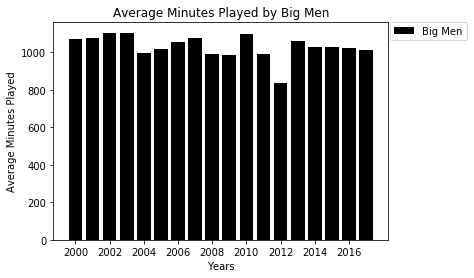

In [120]:
#Big Men Minutes


big_plot = plt.bar(avg_min_big["Year"], avg_min_big["MP"], color='Black')


#Change values of xticks
plt.xticks(np.arange(2000,2018,step=2))
plt.legend([big_plot], ["Big Men"], loc='best', bbox_to_anchor = (1.25,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Big Men")


plt.show()

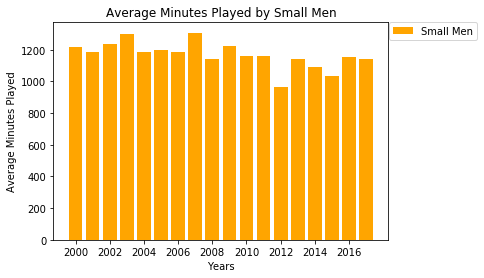

In [131]:
#Small Men Minutes

small_plot = plt.bar(avg_min_small["Year"], avg_min_small["MP"], color='Orange')


#Change values of xticks
plt.xticks(np.arange(2000,2018,step=2))
plt.legend([small_plot], ["Small Men"], loc='outside', bbox_to_anchor = (1.28,1.025))

#Set Axis Labels and Titles
plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes Played by Small Men")

plt.show()

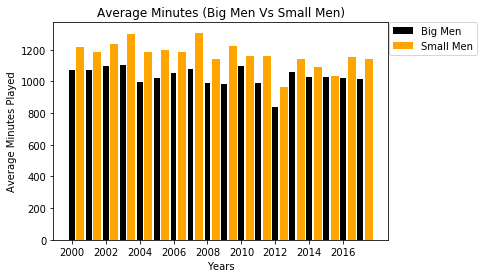

In [140]:
#all Together
big_plot = plt.bar(avg_min_big["Year"], avg_min_big["MP"], color='Black',width = 0.35)
small_plot = plt.bar(avg_min_small["Year"] + 0.5, avg_min_small["MP"], color='Orange',width = 0.5)



#Change values of xticks
plt.xticks(np.arange(2000,2018,step=2))
plt.legend([big_plot,small_plot], ["Big Men","Small Men"], loc='outside', bbox_to_anchor = (1.28,1.025))

plt.xlabel("Years")
plt.ylabel("Average Minutes Played")
plt.title("Average Minutes (Big Men Vs Small Men)")

plt.show()

#### Free Throws Attempted and Free Throw Percentage

###  Statistical Data Analysis
***